Adjust parameters of GrabCut algorithm to get the best result and compare to the result of u2Net-p neural network

In [1]:
from matplotlib import pyplot as plt
from pathlib import Path

import numpy as np

import cv2
from skimage import io

def imshow(np_img, size=(10, 10), is_gray=False):
    plt.figure(figsize=size)
    if is_gray:
        plt.imshow(np_img, cmap='gray', vmin=0, vmax=255)
    else:
        plt.imshow(np_img)
    plt.show()

In [2]:
data_dir = Path('assets')
assert data_dir.exists()

# GrabCut

In [56]:
def remove_backhround(img_path, rect, n_iters=1):
    """
    rect - It is the coordinates of a rectangle which includes the foreground object in the format (x,y,w,h)
    """
    
    img = cv2.cvtColor(io.imread(img_path), cv2.COLOR_BGR2RGB)
    (w,h) = img.shape[:2]

    

    mask = np.zeros((w,h),np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    # cv2.grabCut(img,mask,rect,bgdModel,fgdModel,10,cv2.GC_INIT_WITH_RECT)
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,n_iters,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img_sep = img*mask2[:,:,np.newaxis]

    img_copy = img.copy()
    cv2.rectangle(img_copy, (rect[0], rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (255,0,0), 2)
    imshow(img_copy)
    imshow(mask2*255, is_gray=True)
    imshow(img_sep)

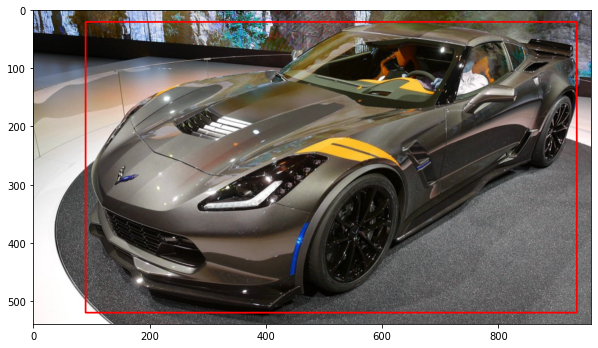

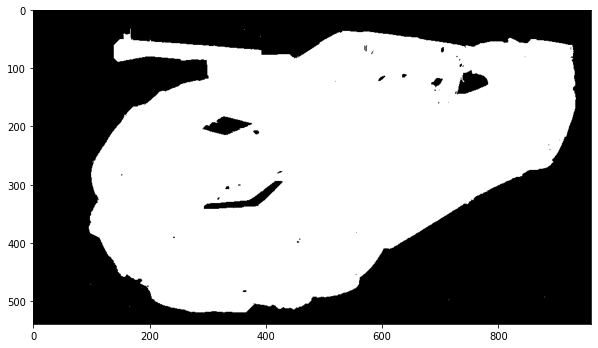

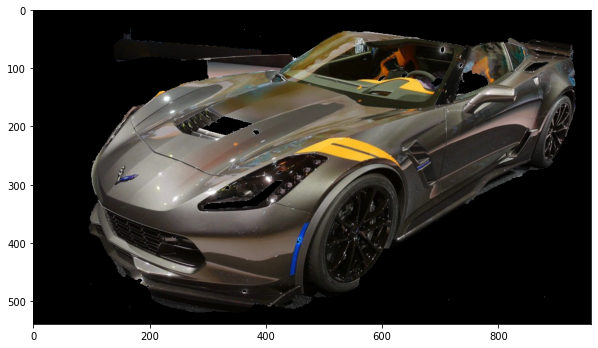

In [48]:
remove_backhround(data_dir / 'obj1.jpg', (90,20, 845, 500), 30)

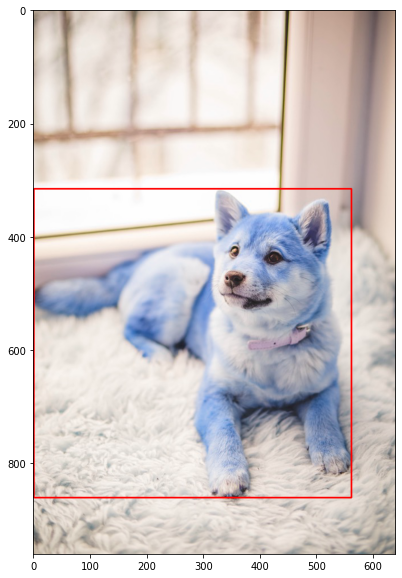

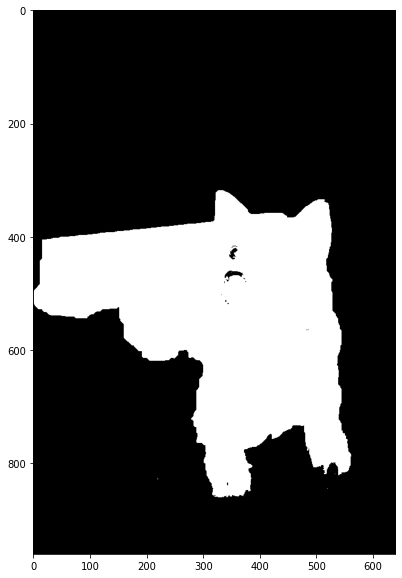

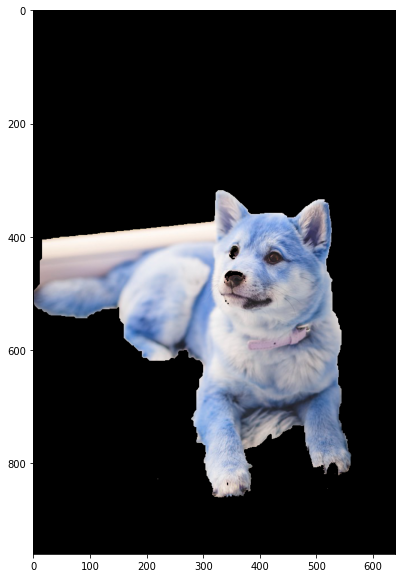

In [66]:
remove_backhround(data_dir / 'obj2.jpg', (1,315, 560, 545), 15)

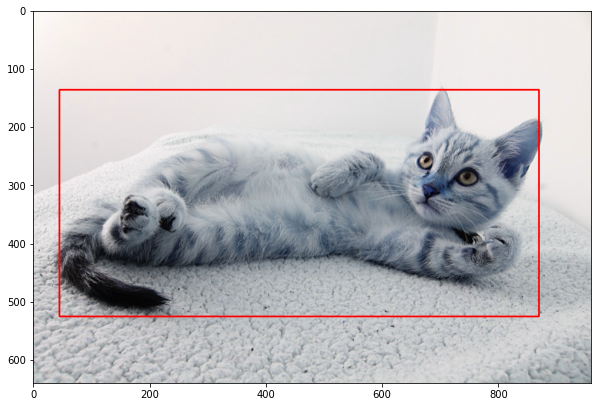

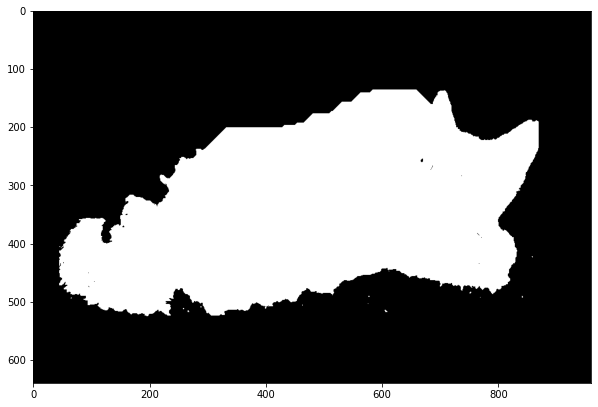

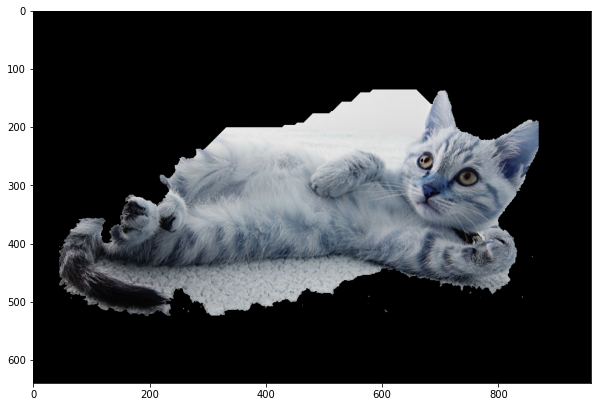

In [65]:
remove_backhround(data_dir / 'obj3.jpg', (45,135, 825, 390), 13)

# u2Net-p neural network